In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(33)

class Pandemic_Agent_Model:
    """
    Agent-Based Model for Pandemic Spread Simulation
    
    States:
    - 0: Susceptible (S)
    - 1: Infected (I)
    - 2: Recovered (R)
    """
    
    def __init__(self, grid_size=75, n_agents=100, n_infected=5, 
                 p_infection=0.1, p_recovery=0.05):
        """
        grid_size : Size of the square grid
        n_agents : Total number of agents
        n_infected : Initial number of infected agents
        p_infection : Probability of infection at each timestep
        p_recovery : Probability of recovery at each timestep
        """
        self.grid_size = grid_size
        self.n_agents = n_agents
        self.p_infection = p_infection
        self.p_recovery = p_recovery
        
        # Initialize agent positions on 75*75 grid
        self.positions = np.random.randint(0, grid_size, size=(n_agents, 2))
        
        # Initialize agent states to Susceptible (0)
        self.states = np.zeros(n_agents, dtype=int)
        infected_indices = np.random.choice(n_agents, size=n_infected, replace=False)
        self.states[infected_indices] = 1  # Initialize infected agents
        
        self.history = {'S': [], 'I': [], 'R': []}
        
    def get_neighbors(self, position):
        """Get valid neighboring positions"""
        x, y = position
        neighbors = [
            (x, y),     
            (x-1, y),    
            (x+1, y),    
            (x, y-1),    
            (x, y+1)  
        ]
        
        # Filter valid positions within boundary
        valid_neighbors = [(nx, ny) for nx, ny in neighbors 
                          if 0 <= nx < self.grid_size and 0 <= ny < self.grid_size]
        return valid_neighbors
    
    def move_agent(self, agent_idx):
        """Move a single agent according to random walk (Brownian motion)"""
        current_pos = self.positions[agent_idx]
        neighbors = self.get_neighbors(current_pos)
        
        # Choose random neighbor
        new_pos = neighbors[np.random.randint(len(neighbors))]
        self.positions[agent_idx] = np.array(new_pos)
    
    def transmission_step(self):
        """infection transmission"""
        # Find all infected agents' positions
        infected_cells = set()
        for agent_idx in range(self.n_agents):
            if self.states[agent_idx] == 1:  # Infected
                infected_cells.add(tuple(self.positions[agent_idx]))
        
        # Check susceptible agents for infection
        for agent_idx in range(self.n_agents):
            # if the agent is susceptible
            if self.states[agent_idx] == 0: 
                agent_pos = tuple(self.positions[agent_idx])
                # if in contact with infected cell
                if agent_pos in infected_cells:
                    if np.random.random() < self.p_infection:
                        self.states[agent_idx] = 1
    
    def recovery_step(self):
        """recovery of infected agents"""
        for agent_idx in range(self.n_agents):
            # Convert infected to recovered
            if self.states[agent_idx] == 1: 
                if np.random.random() < self.p_recovery:
                    self.states[agent_idx] = 2

    def record_state(self):
        """ Record current counts of S, I, R """
        self.history['S'].append(np.sum(self.states == 0))
        self.history['I'].append(np.sum(self.states == 1))
        self.history['R'].append(np.sum(self.states == 2))
    
    def step(self):
        """Execute one time step of the simulation"""
        for agent_idx in range(self.n_agents):
            self.move_agent(agent_idx)
        
        self.transmission_step()
        self.recovery_step()
        self.record_state()
    
    def run(self, n_steps=200):
        """Run the simulation for n_steps"""
        # Record initial state
        self.record_state()
        
        for _ in range(n_steps):
            self.step()
        
        return self.history

def plot_sir_curves(history, title="SIR Dynamics Over Time"):
    """Plot S, I, R curves over time"""
    plt.figure(figsize=(10, 6))
    time_steps = range(len(history['S']))
    
    plt.plot(time_steps, history['S'], label='Susceptible', color='blue', linewidth=2)
    plt.plot(time_steps, history['I'], label='Infected', color='red', linewidth=2)
    plt.plot(time_steps, history['R'], label='Recovered', color='green', linewidth=2)
    
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Number of Agents', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def run_multiple_simulations(n_runs=10, **kwargs):
    """Run multiple simulations and compute average"""
    all_histories = []
    for _ in range(n_runs):
        model = Pandemic_Agent_Model(**kwargs)
        history = model.run(n_steps=200)
        all_histories.append(history)
    
    avg_history = {
        'S': np.mean([h['S'] for h in all_histories], axis=0),
        'I': np.mean([h['I'] for h in all_histories], axis=0),
        'R': np.mean([h['R'] for h in all_histories], axis=0)
    }
    
    return avg_history, all_histories

def analyze_peak_metrics(history):
    """Extract key metrics from simulation"""
    infected = np.array(history['I'])
    return {
        'peak_infected': np.max(infected),
        'time_to_peak': np.argmax(infected)
    }



[A.iii] Running single simulation with p=0.1, q=0.05...


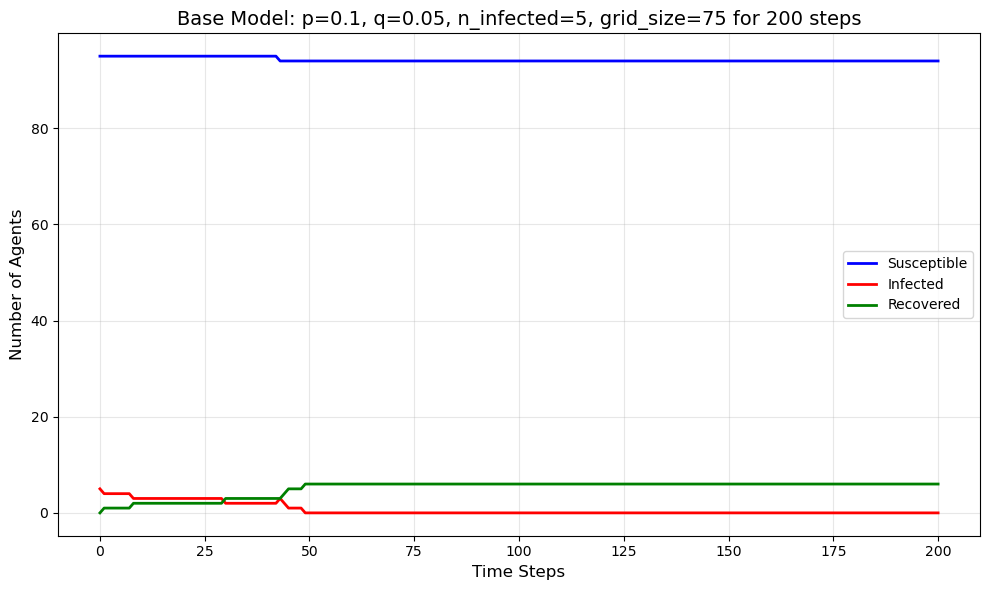


[A.iv] Sensitivity Analysis for different p and q values...
Running simulation for p=0.05, q=0.02, n_infected=5, grid_size=75...
Peak infected: 5, Time to peak: 0
Running simulation for p=0.05, q=0.05, n_infected=5, grid_size=75...
Peak infected: 5, Time to peak: 0
Running simulation for p=0.1, q=0.02, n_infected=5, grid_size=75...
Peak infected: 5, Time to peak: 0
Running simulation for p=0.1, q=0.05, n_infected=5, grid_size=75...
Peak infected: 5, Time to peak: 0


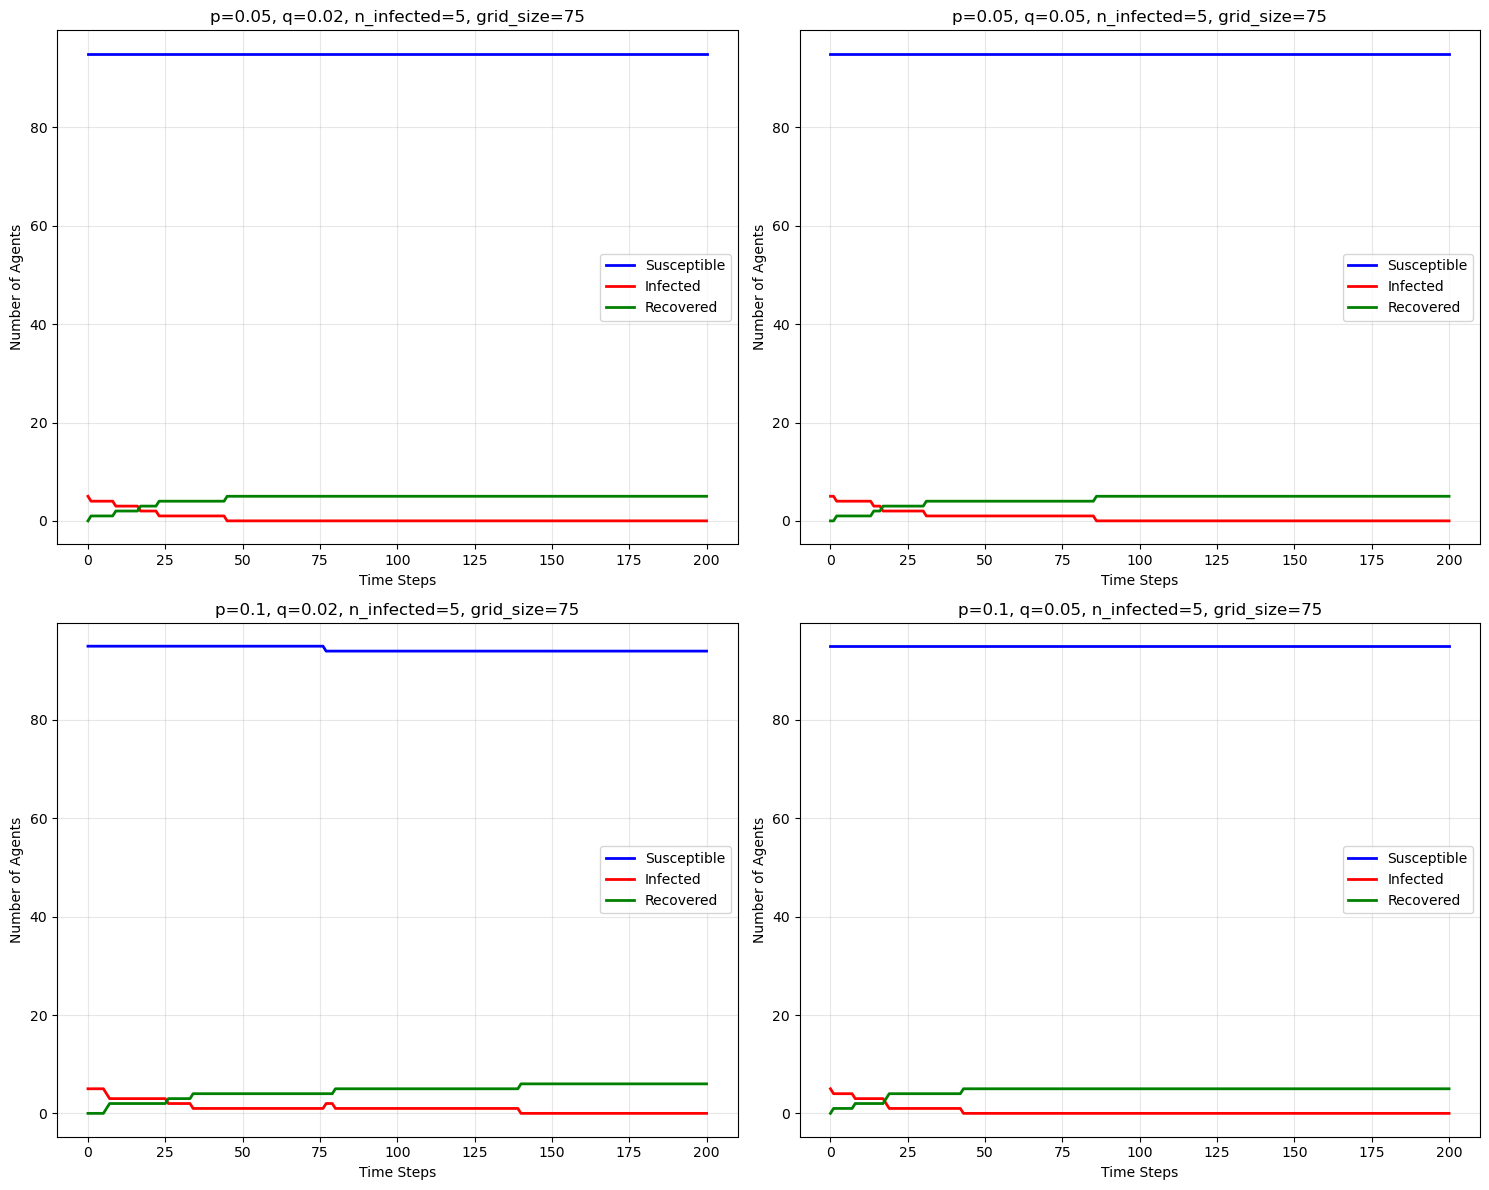


[A.iv] Running 10 simulations with random initial conditions (grid_size=10, n_infected=10, p=0.5, q=0.05)...


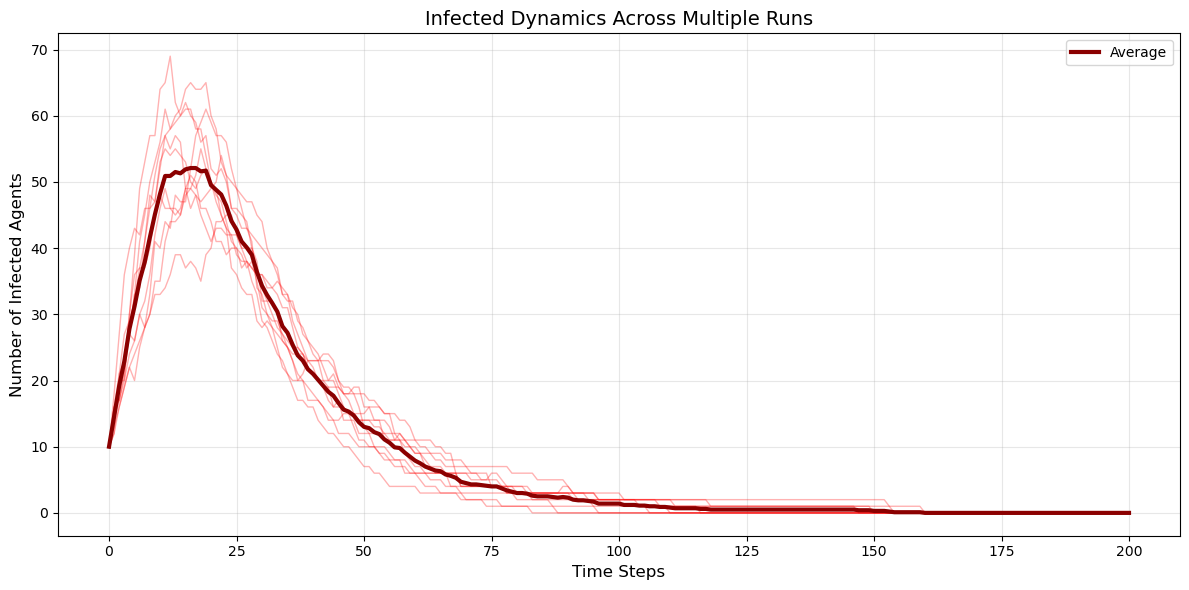

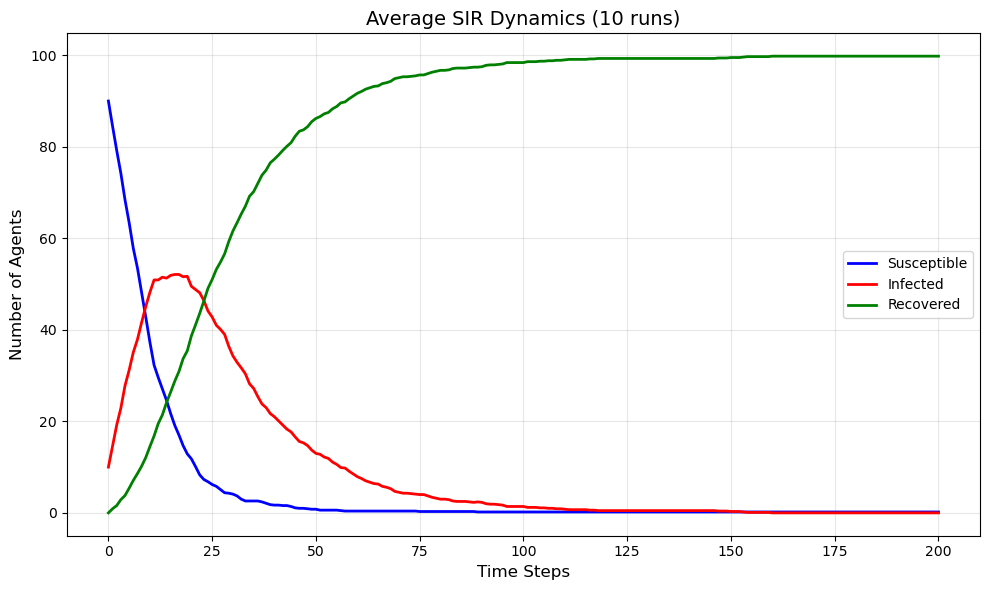

Peak infected: 52.1, Time to peak: 16


In [ ]:
# Part A: Base Model

# A.iii: Single simulation
print("\n[A.iii] Running single simulation with p=0.1, q=0.05...")
model = Pandemic_Agent_Model(n_agents=100, n_infected=5, p_infection=0.1, p_recovery=0.05)
history = model.run(n_steps=200)
plot_sir_curves(history, "Base Model: p=0.1, q=0.05, n_infected=5, grid_size=75 for 200 steps")

# A.iv: Sensitivity Analysis
print("\n[A.iv] Sensitivity Analysis for different p and q values...")
parameter_combinations = [
    (0.05, 0.02, "p=0.05, q=0.02, n_infected=5, grid_size=75"),
    (0.05, 0.05, "p=0.05, q=0.05, n_infected=5, grid_size=75"),
    (0.1, 0.02, "p=0.1, q=0.02, n_infected=5, grid_size=75"),
    (0.1, 0.05, "p=0.1, q=0.05, n_infected=5, grid_size=75"),
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (p, q, label) in enumerate(parameter_combinations):
    print(f"Running simulation for {label}...")
    model = Pandemic_Agent_Model(p_infection=p, p_recovery=q)
    history = model.run(n_steps=200)
    
    ax = axes[idx]
    time_steps = range(len(history['S']))
    ax.plot(time_steps, history['S'], label='Susceptible', color='blue', linewidth=2)
    ax.plot(time_steps, history['I'], label='Infected', color='red', linewidth=2)
    ax.plot(time_steps, history['R'], label='Recovered', color='green', linewidth=2)
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Number of Agents')
    ax.set_title(label)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    metrics = analyze_peak_metrics(history)
    print(f"Peak infected: {metrics['peak_infected']}, Time to peak: {metrics['time_to_peak']}")

plt.tight_layout()
plt.show()

# A.iv: Simulations with random initial conditions (repeated experiments with average)
print("\n[A.iv] Running 10 simulations with random initial conditions (grid_size=10, n_infected=10, p=0.5, q=0.05)...")
avg_history, all_histories = run_multiple_simulations(n_runs=10, grid_size=10, n_agents=100, n_infected=10, p_infection=0.5, p_recovery=0.05)

# Plot individual runs
plt.figure(figsize=(12, 6))
for history in all_histories:
    plt.plot(range(len(history['I'])), history['I'], alpha=0.3, color='red', linewidth=1)
plt.plot(range(len(avg_history['I'])), avg_history['I'], 
         color='darkred', linewidth=3, label='Average')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Infected Agents', fontsize=12)
plt.title('Infected Dynamics Across Multiple Runs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot average for all compartments
plt.figure(figsize=(10, 6))
time_steps = range(len(avg_history['S']))
plt.plot(time_steps, avg_history['S'], label='Susceptible', color='blue', linewidth=2)
plt.plot(time_steps, avg_history['I'], label='Infected', color='red', linewidth=2)
plt.plot(time_steps, avg_history['R'], label='Recovered', color='green', linewidth=2)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Agents', fontsize=12)
plt.title('Average SIR Dynamics (10 runs)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

metrics_avg = analyze_peak_metrics(avg_history)
print(f"Peak infected: {metrics_avg['peak_infected']}, Time to peak: {metrics_avg['time_to_peak']}")

# The simulations show a similar average trend across different random initial conditions.


[A.iv] Running 10 simulations with random initial conditions (grid_size=10, n_infected=30, p=0.9, q=0.05)...


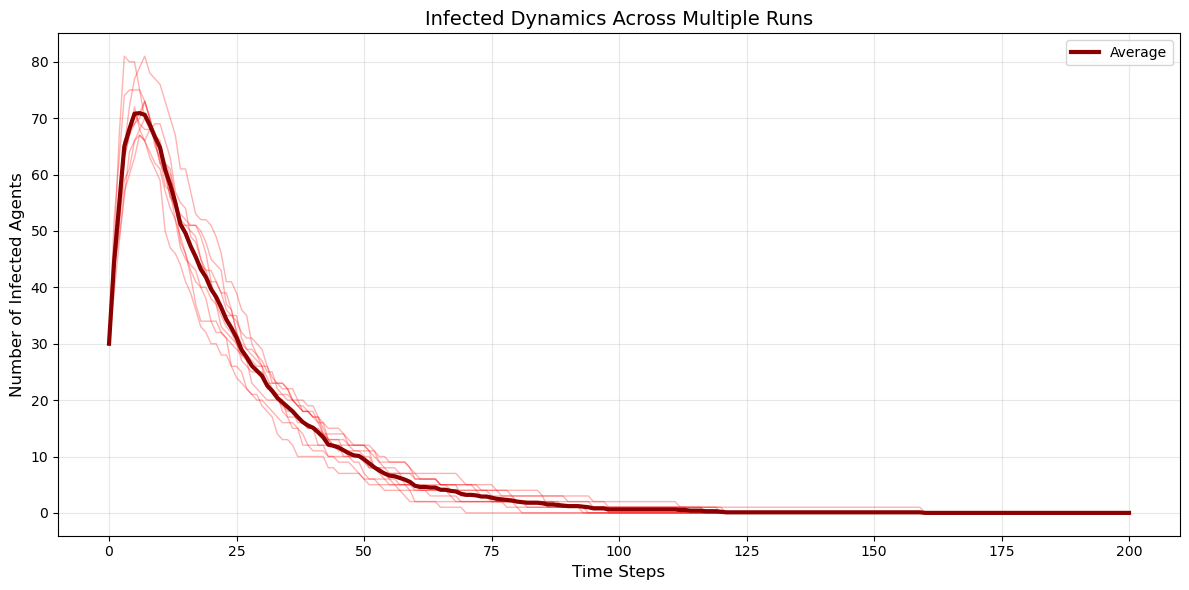

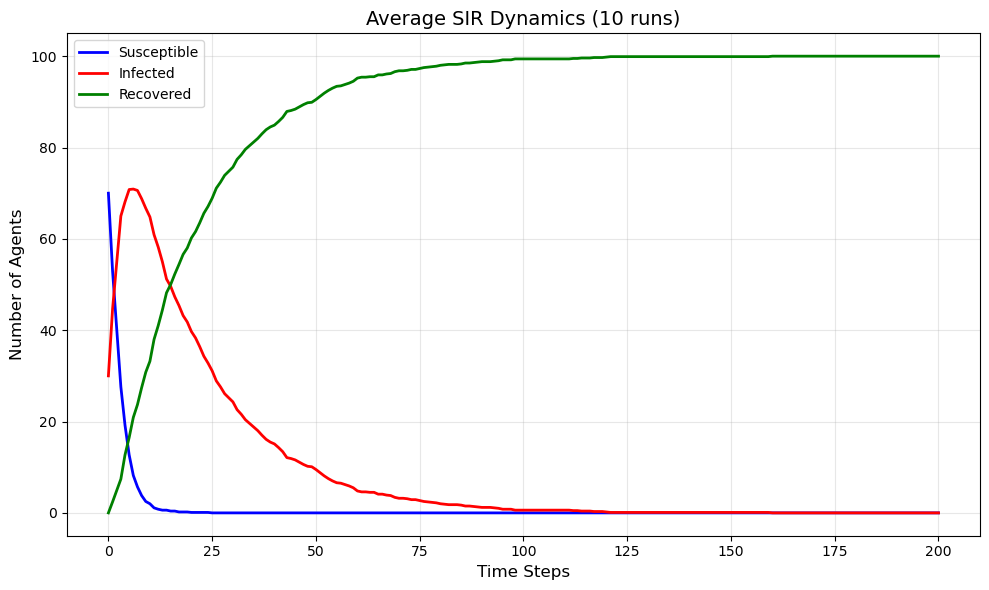

Peak infected: 70.9, Time to peak: 6


In [10]:
# A.iv: Another set of simulations with random initial conditions under smaller grid size
print("\n[A.iv] Running 10 simulations with random initial conditions (grid_size=10, n_infected=30, p=0.9, q=0.05)...")
avg_history, all_histories = run_multiple_simulations(n_runs=10, grid_size=10, n_agents=100, n_infected=30, p_infection=0.9, p_recovery=0.05)

# Plot individual runs
plt.figure(figsize=(12, 6))
for history in all_histories:
    plt.plot(range(len(history['I'])), history['I'], alpha=0.3, color='red', linewidth=1)
plt.plot(range(len(avg_history['I'])), avg_history['I'], 
         color='darkred', linewidth=3, label='Average')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Infected Agents', fontsize=12)
plt.title('Infected Dynamics Across Multiple Runs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot average for all compartments
plt.figure(figsize=(10, 6))
time_steps = range(len(avg_history['S']))
plt.plot(time_steps, avg_history['S'], label='Susceptible', color='blue', linewidth=2)
plt.plot(time_steps, avg_history['I'], label='Infected', color='red', linewidth=2)
plt.plot(time_steps, avg_history['R'], label='Recovered', color='green', linewidth=2)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Agents', fontsize=12)
plt.title('Average SIR Dynamics (10 runs)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

metrics_avg = analyze_peak_metrics(avg_history)
print(f"Peak infected: {metrics_avg['peak_infected']}, Time to peak: {metrics_avg['time_to_peak']}")


[B.i] Running 10 simulations with social distancing measures (grid_size=10, n_infected=30, p=0.3, q=0.05)...


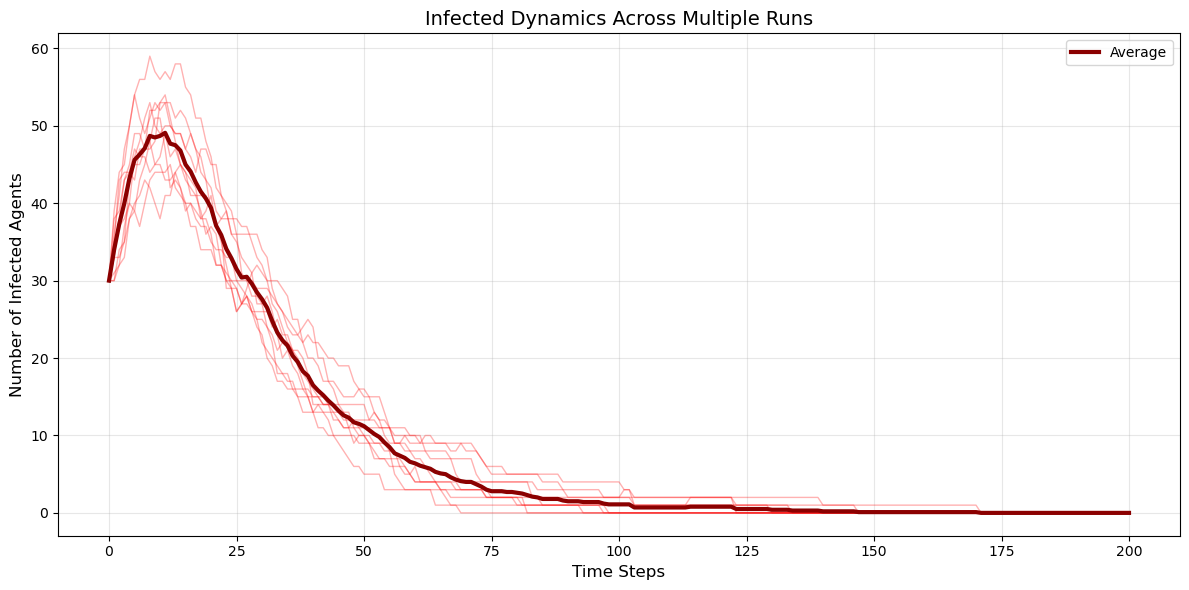

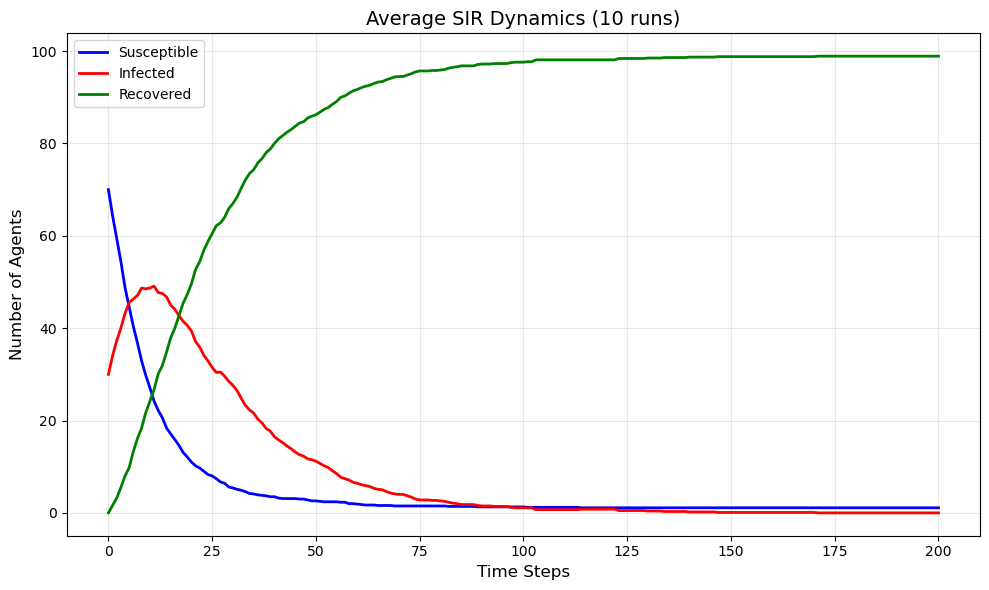

Peak infected: 49.1, Time to peak: 11


In [15]:
# Part B: Extending the Model

"""
B.i.1: When agents have a reduced probability of moving at each step, limiting their interactions. Which parameter of the model should be changed to model this?
Answer: The parameter p_infection should be decreased to reflect the reduced interactions due to limited movement.
Reasoning: Reduced movement means agents are less likely to come into contact with infected individuals, thereby lowering the chance of transmission. By decreasing p_infection, we simulate the effect of limited interactions on disease spread.
"""

"""
B.i.2: When agents actively move away from cells with infected individuals when possible, simulating avoidance behavior. Which parameter of the model should be changed to model this?
Answer: The parameter p_infection should be decreased to reflect the reduced interactions due to avoidance behavior.
Reasoning: If agents actively avoid infected individuals, the likelihood of coming into contact with an infected agent decreases. By lowering p_infection, we can simulate the effect of avoidance behavior on reducing disease transmission.
"""

# With social distancing measures (B.i.3)
print("\n[B.i] Running 10 simulations with social distancing measures (grid_size=10, n_infected=30, p=0.3, q=0.05)...")
avg_history, all_histories = run_multiple_simulations(n_runs=10, grid_size=10, n_agents=100, n_infected=30, p_infection=0.3, p_recovery=0.05)

# Plot individual runs
plt.figure(figsize=(12, 6))
for history in all_histories:
    plt.plot(range(len(history['I'])), history['I'], alpha=0.3, color='red', linewidth=1)
plt.plot(range(len(avg_history['I'])), avg_history['I'], 
         color='darkred', linewidth=3, label='Average')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Infected Agents', fontsize=12)
plt.title('Infected Dynamics Across Multiple Runs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot average for all compartments
plt.figure(figsize=(10, 6))
time_steps = range(len(avg_history['S']))
plt.plot(time_steps, avg_history['S'], label='Susceptible', color='blue', linewidth=2)
plt.plot(time_steps, avg_history['I'], label='Infected', color='red', linewidth=2)
plt.plot(time_steps, avg_history['R'], label='Recovered', color='green', linewidth=2)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Agents', fontsize=12)
plt.title('Average SIR Dynamics (10 runs)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

metrics_avg = analyze_peak_metrics(avg_history)
print(f"Peak infected: {metrics_avg['peak_infected']}, Time to peak: {metrics_avg['time_to_peak']}")

In [ ]:
"""
B.i.4: Which parameter impacts the maximum number of infected subjects at each time window to prevent the healthcare system overwhelm?
Answer: The parameter p_infection significantly impacts the maximum number of infected subjects at each time window.
Reasoning: A lower p_infection reduces the likelihood of disease transmission, thereby flattening the infection curve and reducing the number of infections at peak. By controlling p_infection, we can manage the peak number of infected individuals, helping to prevent overwhelming the healthcare system.
"""

In [12]:
"""
B.ii:
In terms of the peak number of infected individuals and time to peak, without social distancing measures, wih 10 simulations under random initial conditions, the model gives an average of 
70.9 individuals at peak infection while reaching the peak in 6 time steps; with social distancing measures, the model gives an average of 51.3 individuals at peak infection while reaching the peak in 12 time steps.

This indicates that social distancing measures effectively reduce the peak number of infections and delay the time to peak, which can help alleviate pressure on healthcare systems during a pandemic. This is also
reflected by a flatter number of infected curve, as seen in the plots above. However, the time steps taken to reach a neuralized state (where infections drop to zero and no new infections occur) appears to
be longer with social distancing, as the disease both spreads and ends more slowly through the population.

In real-world scenarios, implementing social distancing could be a crucial strategy to manage healthcare resources and reduce the overall impact of a pandemic, since medical resources are often limited, and 
more effective treatment measures could come out over time, such as vaccines and antiviral drugs. The trade-off would be a longer time span of the pandemic, but should be a secondary consideration comparing to 
overwhelming the healthcare system at peak infection times.
"""


'\nB.ii:\nIn terms of the peak number of infected individuals and time to peak, without social distancing measures, wih 10 simulations under random initial conditions, the model gives an average of \n70.9 individuals at peak infection while reaching the peak in 6 time steps; with social distancing measures, the model gives an average of 51.3 individuals at peak infection while reaching the peak in 12 time steps.\n\nThis indicates that social distancing measures effectively reduce the peak number of infections and delay the time to peak, which can help alleviate pressure on healthcare systems during a pandemic. This is also\nreflected by a flatter number of infected curve, as seen in the plots above. However, the time steps taken to reach a neuralized state (where infections drop to zero and no new infections occur) appears to\nbe longer with social distancing, as the disease both spreads and ends more slowly through the population.\n\nIn real-world scenarios, implementing social distan


[B.i] Running 10 simulations with social distancing measures (grid_size=10, n_infected=30, p=0.1, q=0.05)...


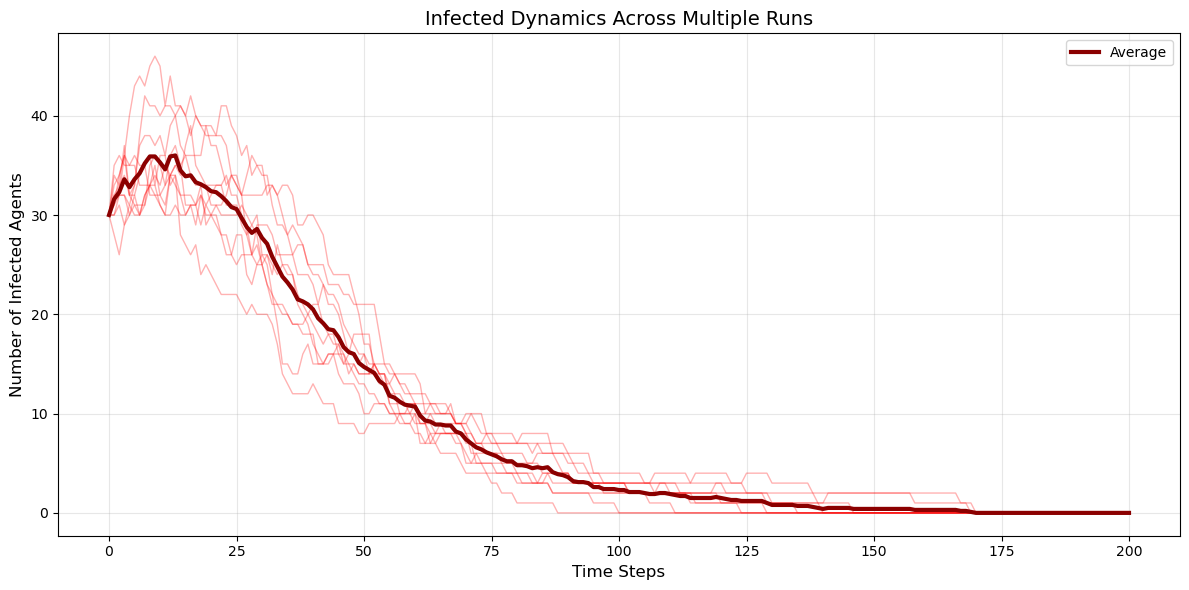

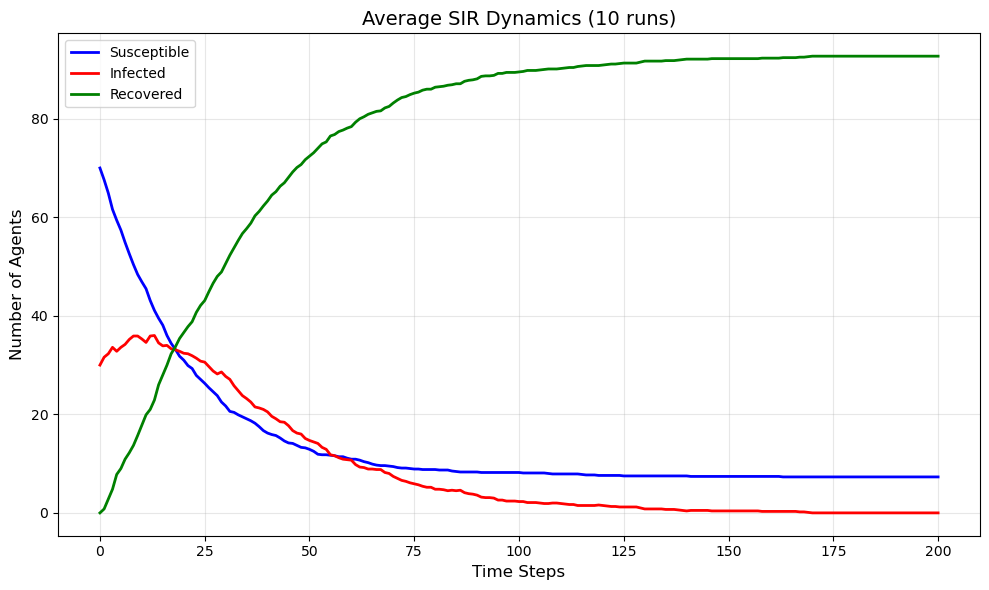

Peak infected: 36.0, Time to peak: 13


In [19]:
# B.iii
# With varying strength of social distancing measures (B.iii)
print("\n[B.i] Running 10 simulations with social distancing measures (grid_size=10, n_infected=30, p=0.1, q=0.05)...")
avg_history, all_histories = run_multiple_simulations(n_runs=10, grid_size=10, n_agents=100, n_infected=30, p_infection=0.15, p_recovery=0.05)

# Plot individual runs
plt.figure(figsize=(12, 6))
for history in all_histories:
    plt.plot(range(len(history['I'])), history['I'], alpha=0.3, color='red', linewidth=1)
plt.plot(range(len(avg_history['I'])), avg_history['I'], 
         color='darkred', linewidth=3, label='Average')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Infected Agents', fontsize=12)
plt.title('Infected Dynamics Across Multiple Runs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot average for all compartments
plt.figure(figsize=(10, 6))
time_steps = range(len(avg_history['S']))
plt.plot(time_steps, avg_history['S'], label='Susceptible', color='blue', linewidth=2)
plt.plot(time_steps, avg_history['I'], label='Infected', color='red', linewidth=2)
plt.plot(time_steps, avg_history['R'], label='Recovered', color='green', linewidth=2)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Agents', fontsize=12)
plt.title('Average SIR Dynamics (10 runs)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

metrics_avg = analyze_peak_metrics(avg_history)
print(f"Peak infected: {metrics_avg['peak_infected']}, Time to peak: {metrics_avg['time_to_peak']}")


[B.i] Running 10 simulations with social distancing measures (grid_size=10, n_infected=30, p=0.6, q=0.05)...


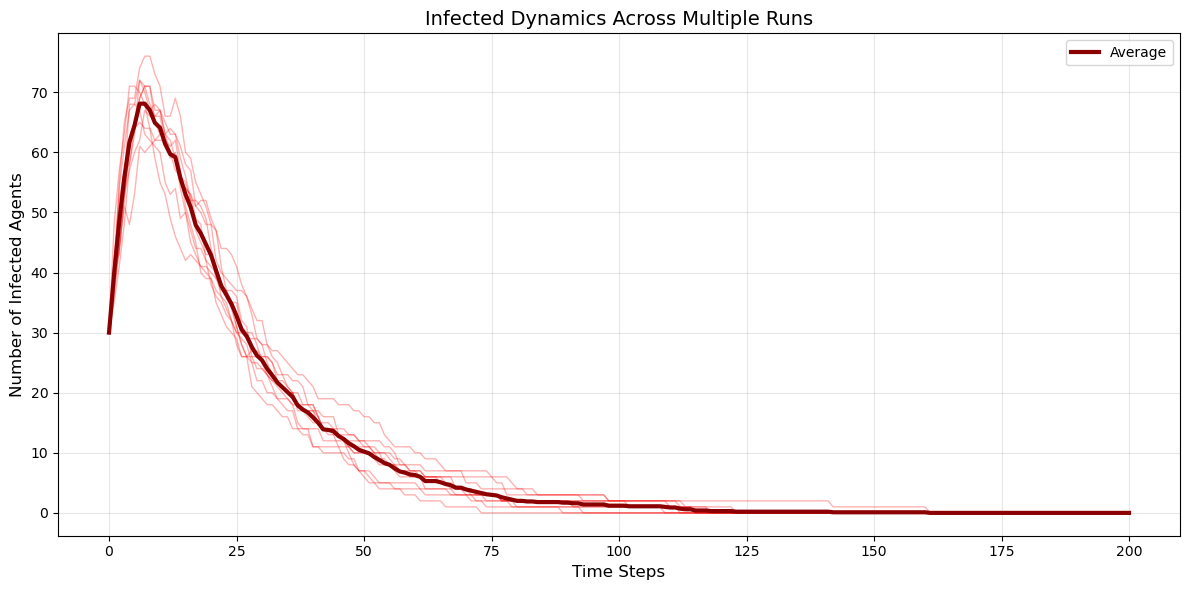

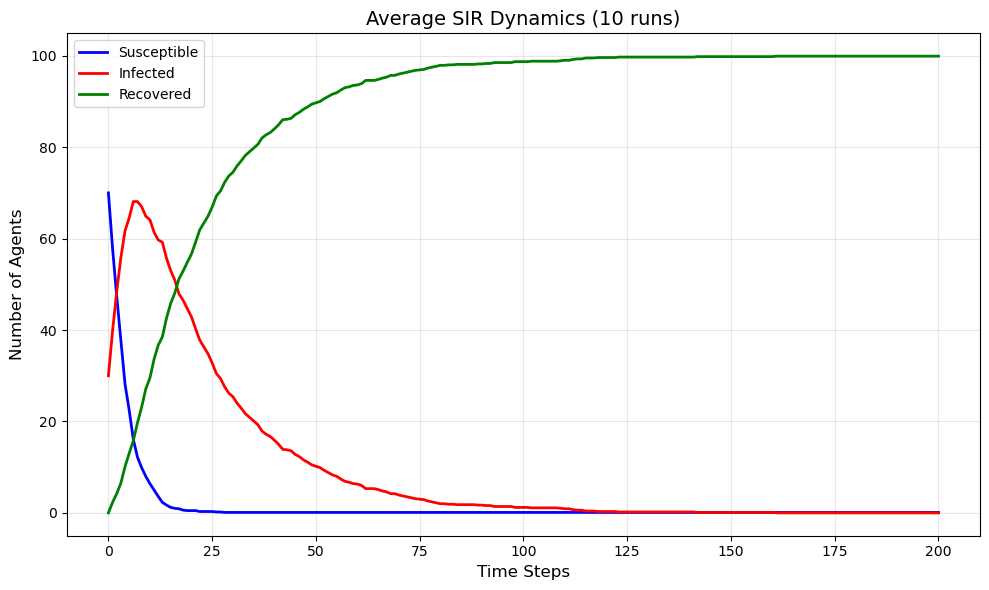

Peak infected: 68.1, Time to peak: 6


In [21]:
# B.iii
# With varying strength of social distancing measures (B.iii)
print("\n[B.i] Running 10 simulations with social distancing measures (grid_size=10, n_infected=30, p=0.6, q=0.05)...")
avg_history, all_histories = run_multiple_simulations(n_runs=10, grid_size=10, n_agents=100, n_infected=30, p_infection=0.6, p_recovery=0.05)

# Plot individual runs
plt.figure(figsize=(12, 6))
for history in all_histories:
    plt.plot(range(len(history['I'])), history['I'], alpha=0.3, color='red', linewidth=1)
plt.plot(range(len(avg_history['I'])), avg_history['I'], 
         color='darkred', linewidth=3, label='Average')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Infected Agents', fontsize=12)
plt.title('Infected Dynamics Across Multiple Runs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot average for all compartments
plt.figure(figsize=(10, 6))
time_steps = range(len(avg_history['S']))
plt.plot(time_steps, avg_history['S'], label='Susceptible', color='blue', linewidth=2)
plt.plot(time_steps, avg_history['I'], label='Infected', color='red', linewidth=2)
plt.plot(time_steps, avg_history['R'], label='Recovered', color='green', linewidth=2)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Agents', fontsize=12)
plt.title('Average SIR Dynamics (10 runs)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

metrics_avg = analyze_peak_metrics(avg_history)
print(f"Peak infected: {metrics_avg['peak_infected']}, Time to peak: {metrics_avg['time_to_peak']}")

In [22]:
"""
I did two experiments with different p_infection values to simulate varying strengths of social distancing measures, each for 10 runs with random initial conditions and taken the average.

The baseline experiment was conducted at p_infection=0.9, which reflects the scenario without social distancing. Then for the subsequent experiments:
Experiment 1: p_infection=0.3, simulating moderate social distancing -> Peak infected: 51.3, Time to peak: 12
Experiment 2: p_infection=0.15, simulating strong social distancing -> Peak infected: 36.0, Time to peak: 13
Experiment 3: p_infection=0.6, simulating weak social distancing -> Peak infected: 68.1, Time to peak: 6

This corresponds with the expectation that stronger social distancing (lower p_infection) leads to a lower peak number of infections and a delayed time to peak, effectively flattening the infection curve.
"""

'\nI did two experiments with different p_infection values to simulate varying strengths of social distancing measures, each for 10 runs with random initial conditions and taken the average.\n\nThe baseline experiment was conducted at p_infection=0.9, which reflects the scenario without social distancing. Then for the subsequent experiments:\nExperiment 1: p_infection=0.3, simulating moderate social distancing -> Peak infected: 51.3, Time to peak: 12\nExperiment 2: p_infection=0.15, simulating strong social distancing -> Peak infected: 36.0, Time to peak: 13\nExperiment 3: p_infection=0.6, simulating weak social distancing -> Peak infected: 68.1, Time to peak: 6\n\nThis corresponds with the expectation that stronger social distancing (lower p_infection) leads to a lower peak number of infections and a delayed time to peak, effectively flattening the infection curve.\n'